In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

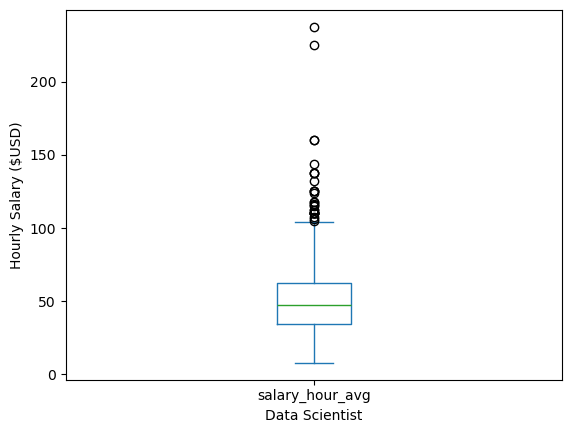

In [4]:
#Data Scientist Hourly Salary Box Plot
#Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

df_DS_US = df[(df['job_title_short']== 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_DS_US = df_DS_US.dropna(subset = 'salary_hour_avg')
df_DS_US['salary_hour_avg'].plot(kind= 'box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.show()

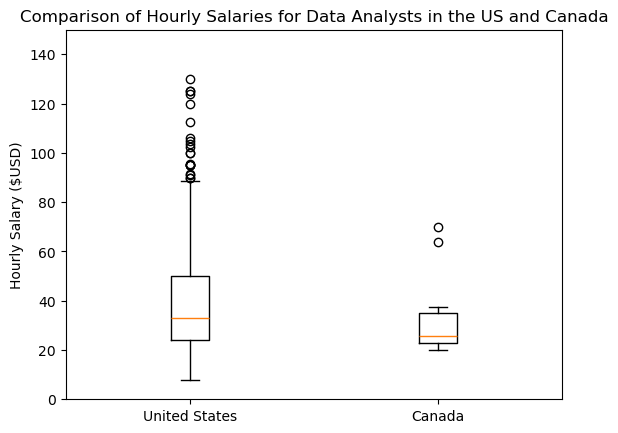

In [16]:
#Comparison of Hourly Salaries for Data Analyst
#Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.
countries = ['United States', 'Canada']

df_DA_US_CA = df[(df['job_title_short']== 'Data Analyst') & (df['job_country'].isin(countries))].dropna(subset = 'salary_hour_avg').copy()

list = [df_DA_US_CA[df_DA_US_CA['job_country'] == country]['salary_hour_avg']for country in countries]
plt.boxplot(list, tick_labels = countries)
plt.ylim(0, 150)
plt.ylabel('Hourly Salary ($USD)')
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

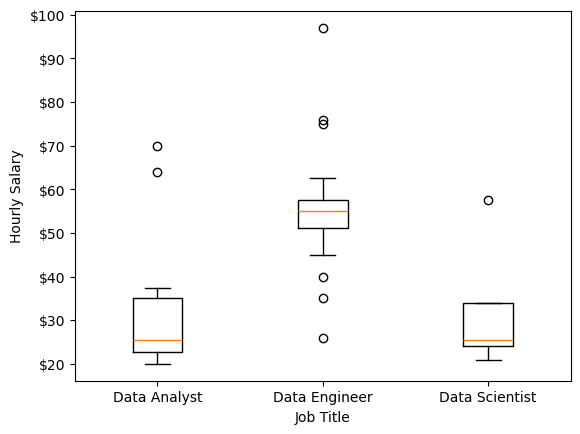

In [28]:
#Comprehension of Hourly Salaries in Canada
#Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset = 'salary_hour_avg').copy()

filtered = [df_CA[df_CA['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

# Create a box plot using ax.boxplot() after setting up your figure and axes with plt.subplots().
# Customize the x-axis and y-axis labels using ax.set_xlabel() and ax.set_ylabel().
# Apply a custom formatter to the y-axis to format salary values as currency.

fig, ax = plt.subplots()
ax.boxplot(filtered, tick_labels = job_titles)
ax.set_xlabel('Job Title') 
ax.set_ylabel('Hourly Salary')
ticks_y = plt.FuncFormatter(lambda y, pos: f'${int(y)}')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.show()